# 기상 상황 주행 분류 프로젝트 (개인)

### Tensorflow vgg16(280x280) 구현 이미지 분류

##### 1.데이터 로드

In [15]:
from glob import glob

path = 'D://기상 상황 주행 분류 데이터'

train_data = glob(path+'//Train')


In [16]:
import tensorflow as tf
# from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)
val_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [18]:
train_data_gen = train_generator.flow_from_directory(
    directory=path+'//Train',
    target_size=(280,280),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    seed=100,
    subset='training'
)
val_data_gen = val_generator.flow_from_directory(
    directory=path+'//Train',
    target_size=(280,280),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    seed=100,
    subset='validation'
)

Found 36723 images belonging to 4 classes.
Found 9180 images belonging to 4 classes.


In [19]:
train_data_gen.classes

array([0, 0, 0, ..., 3, 3, 3])

##### 2. 데이터 split

In [20]:
test_generator = ImageDataGenerator(rescale=1./255)

In [21]:
test_data_gen = test_generator.flow_from_directory(
    directory=path+'//Validation',
    target_size=(280,280),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    seed=100,
)

Found 5738 images belonging to 4 classes.


In [22]:
test_data_gen.classes

array([0, 0, 0, ..., 3, 3, 3])

##### 3. 모델 구성

In [23]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(weights='imagenet',include_top = False,input_shape=(280,280,3))
vgg16.trainable =True

model = Sequential(

    [
    vgg16,
    Flatten(),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')
    ]
)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,812,164
Trainable params: 16,812,164
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

##### 4. 학습

In [27]:
# pip install scipy

history = model.fit_generator(train_data_gen,
                              validation_data=val_data_gen,
                            #   steps_per_epoch=train_data_gen.n//train_data_gen.batch_size,
                            #   validation_steps = val_data_gen.n//val_data_gen.batch_size,
                              epochs=10)

# history = model.fit(train_data_gen.flow(),validation_data=val_data_gen,epochs=10)

Epoch 1/10


c:\Users\user\miniconda3\envs\DL_06_22\lib\site-packages\ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


2296/2296 [==============================] - 1058s 453ms/step - loss: 0.4492 - acc: 0.8883 - val_loss: 0.4194 - val_acc: 0.8614
Epoch 2/10
2296/2296 [==============================] - 979s 426ms/step - loss: 0.1866 - acc: 0.9363 - val_loss: 0.8836 - val_acc: 0.8101
Epoch 3/10
2296/2296 [==============================] - 990s 431ms/step - loss: 0.1752 - acc: 0.9417 - val_loss: 1.6922 - val_acc: 0.7936
Epoch 4/10
2296/2296 [==============================] - 970s 423ms/step - loss: 0.1328 - acc: 0.9550 - val_loss: 0.6218 - val_acc: 0.8270
Epoch 5/10
2296/2296 [==============================] - 961s 418ms/step - loss: 0.1238 - acc: 0.9596 - val_loss: 1.6181 - val_acc: 0.7862
Epoch 6/10
2296/2296 [==============================] - 951s 414ms/step - loss: 0.0808 - acc: 0.9731 - val_loss: 0.7198 - val_acc: 0.8390
Epoch 7/10
2296/2296 [==============================] - 948s 413ms/step - loss: 0.1248 - acc: 0.9699 - val_loss: 0.8760 - val_acc: 0.8317
Epoch 8/10
2296/2296 [======================

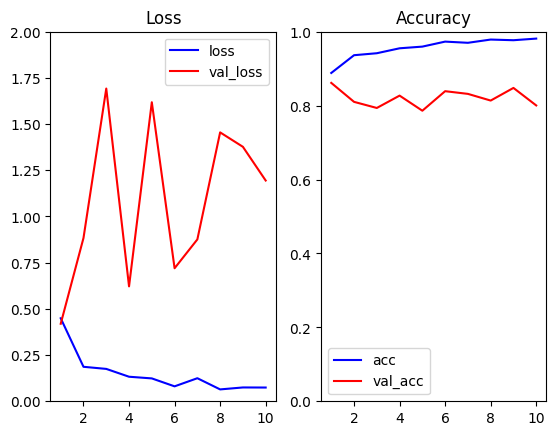

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='blue',label='loss')
plt.plot(range(1,len(loss)+1),val_loss,color='red',label='val_loss')
plt.ylim(0,2.0)
plt.title("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='blue',label='acc')
plt.plot(range(1,len(acc)+1),val_acc,color='red',label='val_acc')
plt.ylim(0,1)
plt.title("Accuracy")
plt.legend()
plt.show()

##### 5.검증

In [32]:
model.evaluate(test_data_gen)

359/359 [==============================] - 118s 328ms/step - loss: 0.3023 - acc: 0.9376


[0.302259236574173, 0.9376088976860046]

##### 6.저장

In [34]:
model.save_weights('.//models//vgg16_weights')